In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

In [9]:
x= np.random.randint(25,50,(25,2))
y= np.random.randint(60,85,(25,2))

z = np.vstack((x,y))
z=np.float32(z)
print(z)

[[36. 33.]
 [38. 34.]
 [26. 48.]
 [44. 36.]
 [36. 34.]
 [38. 33.]
 [33. 42.]
 [39. 38.]
 [27. 26.]
 [32. 41.]
 [42. 37.]
 [37. 31.]
 [45. 31.]
 [42. 33.]
 [48. 35.]
 [37. 27.]
 [45. 35.]
 [25. 42.]
 [45. 40.]
 [29. 39.]
 [40. 37.]
 [33. 44.]
 [38. 47.]
 [39. 27.]
 [27. 42.]
 [84. 83.]
 [67. 62.]
 [68. 80.]
 [63. 82.]
 [73. 74.]
 [81. 73.]
 [76. 61.]
 [69. 70.]
 [69. 74.]
 [82. 68.]
 [83. 70.]
 [77. 81.]
 [72. 75.]
 [66. 73.]
 [78. 74.]
 [82. 78.]
 [64. 81.]
 [76. 82.]
 [79. 83.]
 [65. 70.]
 [84. 63.]
 [63. 70.]
 [75. 71.]
 [65. 72.]
 [66. 69.]]


In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [12]:
A = z[label.ravel() == 0]
B= z[label.ravel() == 1]

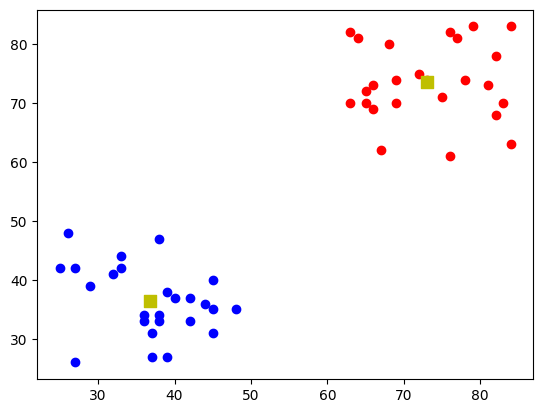

In [13]:

plt.scatter(A[:,0],A[:,1,],c='b')
plt.scatter(B[:,0],B[:,1],c='r')
plt.scatter(center[:,0],center[:,1],s=80,c='y',marker='s')

plt.show()

(600, 800, 3)
(256, 256)


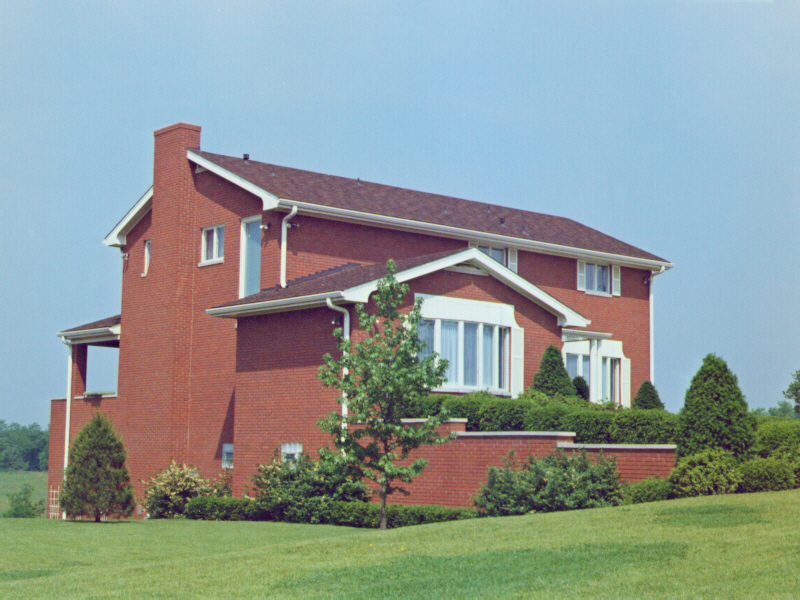

In [14]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/home3.jpg')
print(img.shape)
#gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(img)

In [18]:
Z = img.reshape((-1,3))
Z = np.float32(Z)

print(Z.shape)

(480000, 3)


In [27]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

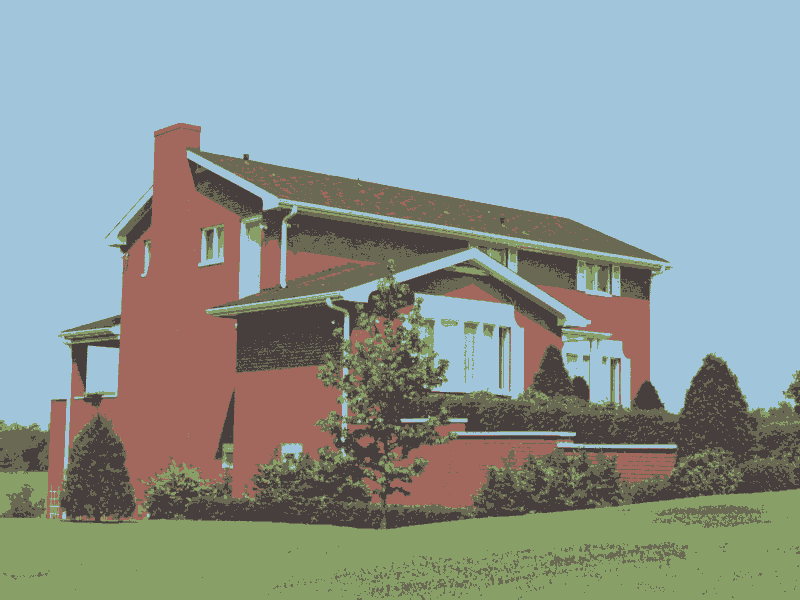

In [28]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)

(480, 1622, 3)


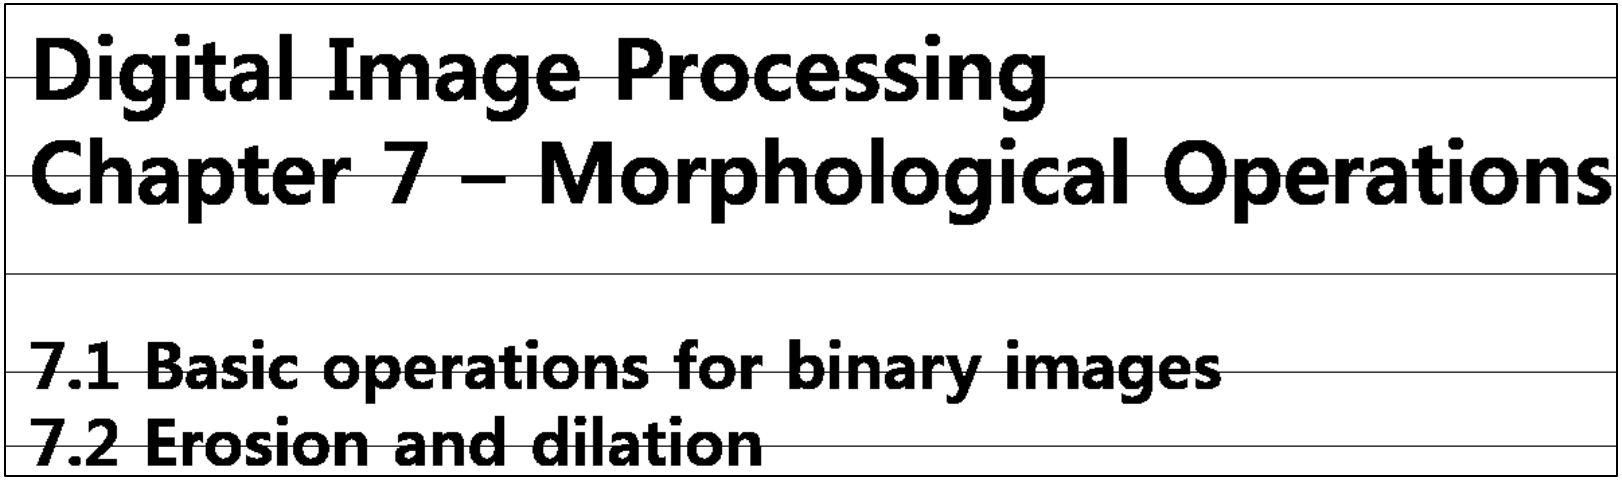

In [31]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/scanimg.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(img)

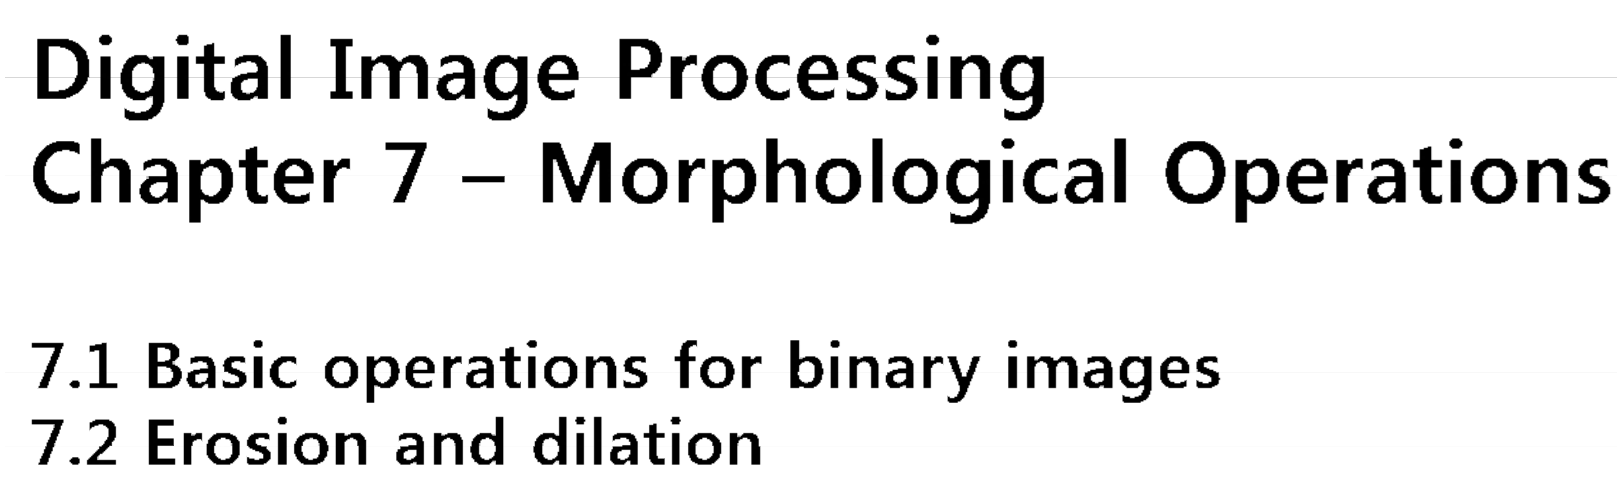

In [33]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(gimg1,kernel,iterations = 1)
cv2_imshow(dilation)

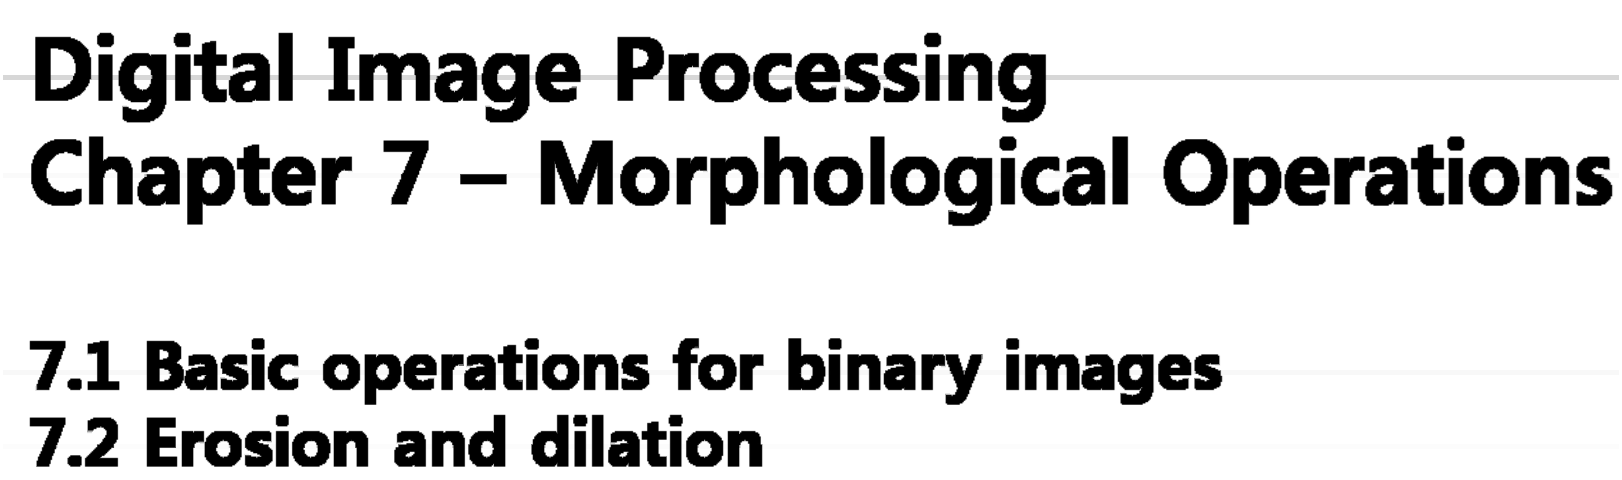

In [34]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
cv2_imshow(erosion)

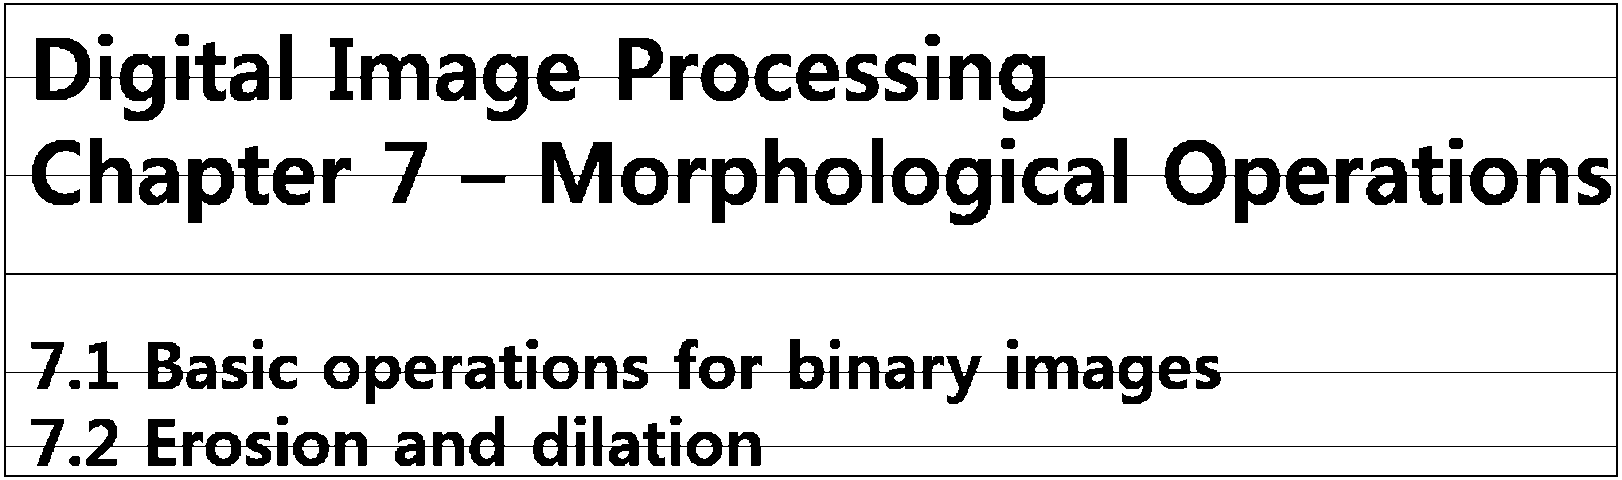

In [43]:
gbin = np.zeros((gimg1.shape[0],gimg1.shape[1]), dtype = np.uint8)

for i in range(gimg1.shape[0]):
  for j in range(gimg1.shape[1]):
    if gimg1[i,j] > 100:
      gbin[i,j] = 255
    else:
      gbin[i,j] = 0

cv2_imshow(gbin)

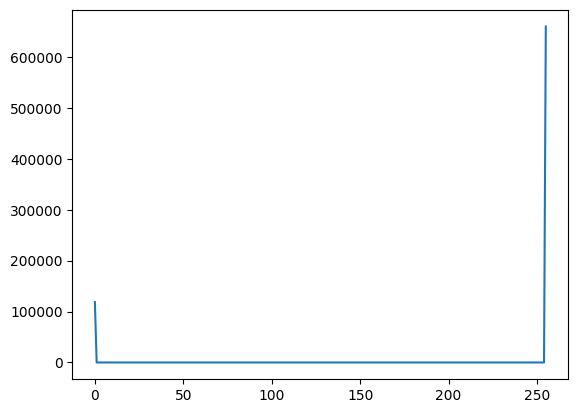

In [44]:
hist = cv2.calcHist([gbin],[0],None,[256],[0,256])
plt.plot(hist)


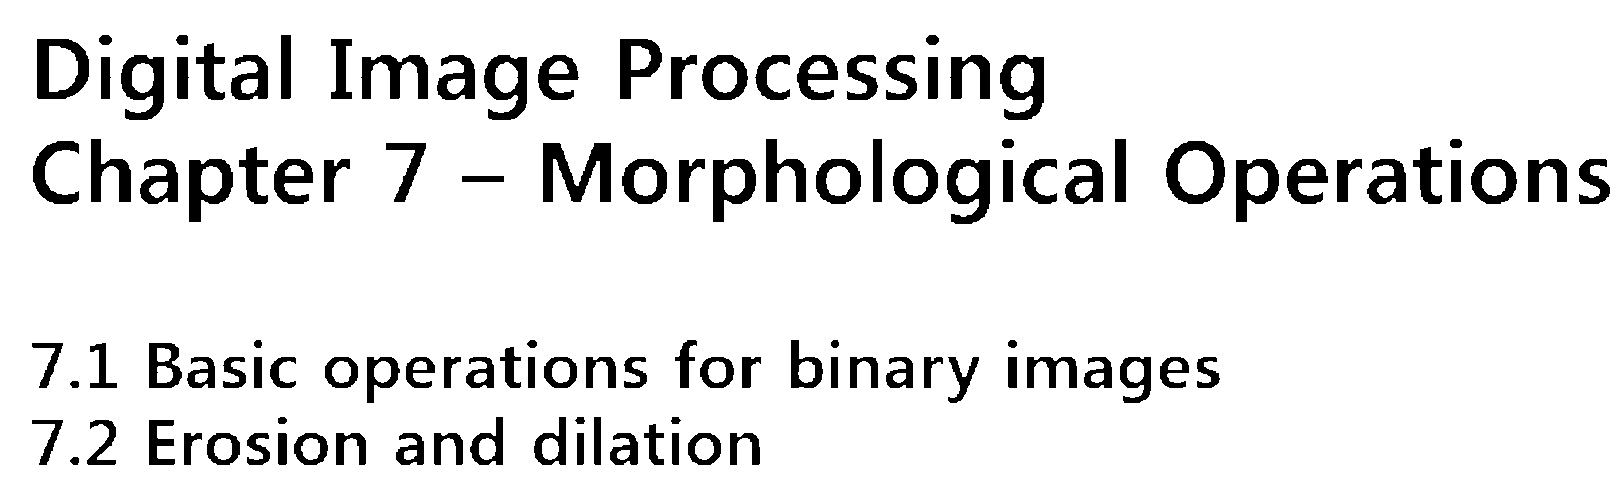

In [41]:
kernel = np.ones((3,3),np.uint8)
dilation1 = cv2.dilate(gbin,kernel,iterations = 1)
cv2_imshow(dilation1)

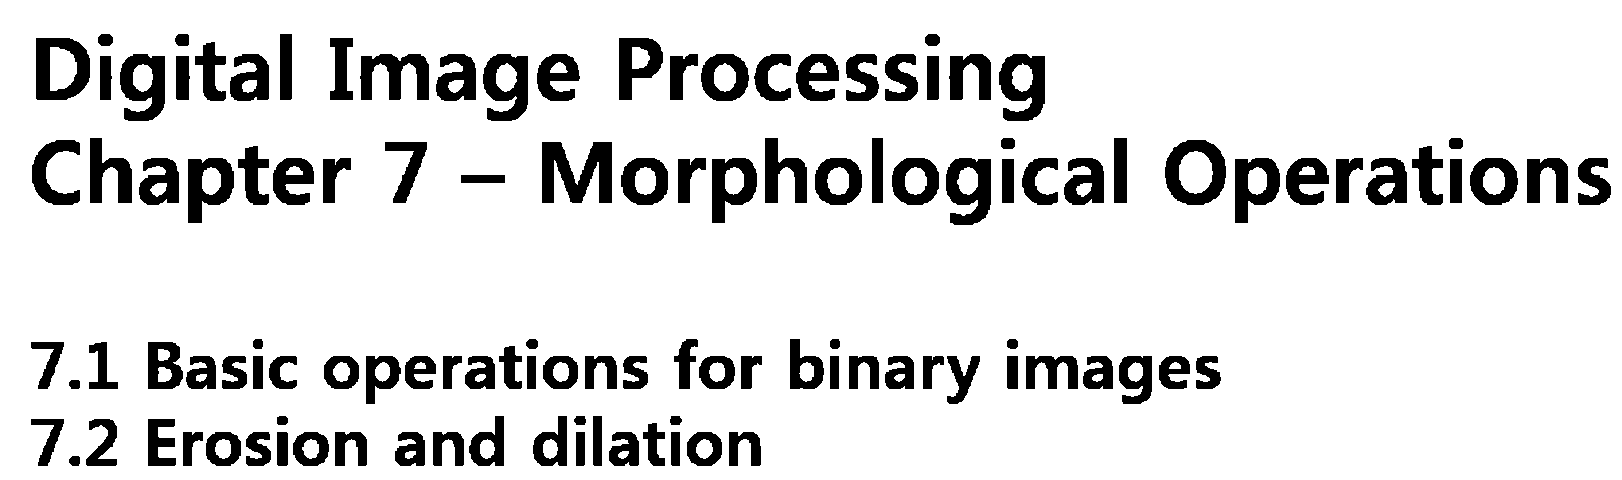

In [42]:
kernel = np.ones((3,3),np.uint8)
erosion1 = cv2.erode(dilation,kernel,iterations = 1)
cv2_imshow(erosion1)